# Libraries and versions

In [57]:
python_version = !python -V #version 3.8.8
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.1
import matplotlib as plt #version 3.3.4
import jebas

In [16]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')

Python version - 3.8.8
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.1
Matplotlib version - 3.3.4


# Configurations

## Pandas

In [17]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Seaborn

In [18]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(20,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [19]:
import warnings
warnings.filterwarnings("ignore")

## Background
When is my university campus gym least crowded, so I know when to work out? We measured how many people were in this gym once every 10 minutes over the last year. We want to be able to predict how crowded the gym will be in the future.

### Goals
**1)** Given a time of day (and maybe some other features, including weather), predict how crowded the gym will be.

**2)** Figure out which features are actually important, which are redundant, and what features could be added to make the predictions more accurate.

### Data
The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

Features:

- date (string; datetime of data)
- timestamp (int; number of seconds since beginning of day)
- dayofweek (int; 0 [monday] - 6 [sunday])
- is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
- is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
- temperature (float; degrees fahrenheit)
- isstartof_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
- month (int; 1 [jan] - 12 [dec])
- hour (int; 0 - 23)


Kaggle link: https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym

## Dataset

In [20]:
gym = pd.read_csv('data.csv')
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [21]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


### Observations:
- there are no missing values for all features
- feature date is not in datetime format (**second** to do)
- feature timestamp will be not necessary (**third** to do)
- must be necessary create two new features = year and day (**first** to do)

## Transformations

#### New features

In [22]:
#year
gym['year'] = gym['date'].str.split('-', expand=True)[0]
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17,2015


In [23]:
#day
gym['day_of_month'] = gym['date'].str.split('-', expand=True)[2]
gym['day_of_month'] = gym['day_of_month'].str.split(expand=True)[0]
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,2015,14
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,2015,14
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17,2015,14
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17,2015,14
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17,2015,14


In [24]:
#date
gym['date'] = gym['date'].str.split(expand=True)[0]
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month
0,37,2015-08-14,61211,4,0,0,71.76,0,0,8,17,2015,14
1,45,2015-08-14,62414,4,0,0,71.76,0,0,8,17,2015,14
2,40,2015-08-14,63015,4,0,0,71.76,0,0,8,17,2015,14
3,44,2015-08-14,63616,4,0,0,71.76,0,0,8,17,2015,14
4,45,2015-08-14,64217,4,0,0,71.76,0,0,8,17,2015,14


#### Drop timestamp

In [25]:
gym.drop(columns=['timestamp'], inplace=True)
gym.head()

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month
0,37,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
1,45,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
2,40,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
3,44,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
4,45,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14


# EDA

## Dependent feature - univariate analysis

In [26]:
gym['number_people'].describe()

count    62184.000000
mean        29.072543
std         22.689026
min          0.000000
25%          9.000000
50%         28.000000
75%         43.000000
max        145.000000
Name: number_people, dtype: float64

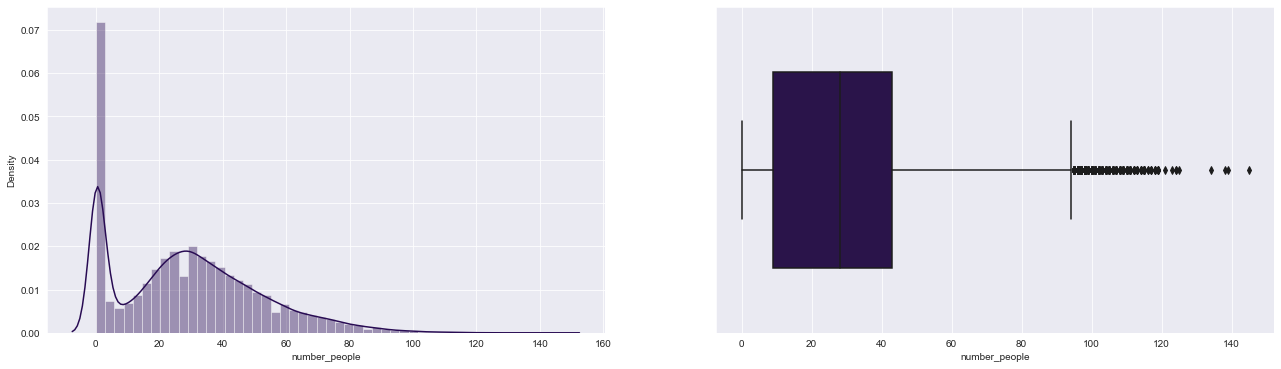

In [56]:
fig, axes = plt.pyplot.subplots(1,2, figsize=(22,6))

sns.distplot(gym['number_people'], ax=axes[0])
sns.boxplot(gym['number_people'], width=0.6, ax=axes[1])
plt.pyplot.show()

============================================================================================================================================
- the feature number_people is not a normal distribution and have some outliers above (almost) 96 persons in gym in one day

- there are very moments which the number of people in gym is zero; what are the gym's opening hours?

============================================================================================================================================

In [44]:
gym['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16,  2,  3,  4], dtype=int64)

In [50]:
gym.query('number_people==0')['hour'].value_counts(normalize=True).round(2)

3     0.15
2     0.15
4     0.13
5     0.12
1     0.12
0     0.08
6     0.07
23    0.05
7     0.04
22    0.02
21    0.02
20    0.01
8     0.01
19    0.01
9     0.01
10    0.00
18    0.00
16    0.00
15    0.00
17    0.00
11    0.00
14    0.00
12    0.00
13    0.00
Name: hour, dtype: float64

============================================================================================================================================
- seems the gym is opening 24 hrs a day

- gym is more empty the late hours (23, 0, 1...6) - that is a obvious observation

- how will be the distribution if consider olny moments when gym has people?

=============================================================================================================================================

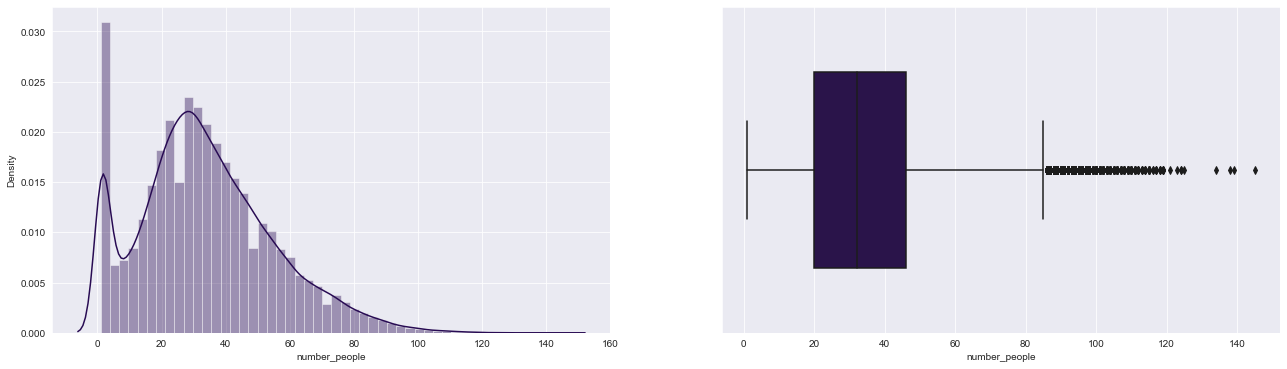

In [55]:
fig, axes = plt.pyplot.subplots(1,2, figsize=(22,6))

sns.distplot(gym.query('number_people!=0')['number_people'], ax=axes[0])
sns.boxplot(gym.query('number_people!=0')['number_people'], width=0.6, ax=axes[1])
plt.pyplot.show()

==============================================================================================================
- the distribution was not normalized and there are outliers in maximum limit

- seems when the number of persons is bigger then almost 83 (the original data these number is almost 96)/ the gym is crowed. let's understand more about it.

===============================================================================================================

### Outliers analysis

In [62]:
jebas.outliers_valores(dados=gym['number_people'])

1° quartil                 9.0
3° quartil                43.0
Intervalo interquartil    34.0
Limite inferior          -42.0
Limite Superior           94.0
dtype: float64

- 94 is the upper limit (mean plus standard deviation) of people in gym 

===============================================================================================================

As the database does not inform about the size of the gym, I will consider that it will be overcrowded when the number of people is greater than the upper limit.

**I will create a feature that classifies into 3 classes:**

**bellow_mean** (below or equal to average)

**above_mean** (between mean and upper limit)

**crowded** (above upper limit)

===============================================================================================================

#### new feature

In [67]:
upper_limit = jebas.outliers_valores(dados=gym['number_people']).loc['Limite Superior']
mean = gym['number_people'].mean()

class_crowded = []
for number in gym['number_people'].values:
    if number >= upper_limit:
        class_crowded.append('crowded')
    elif number > mean:
        class_crowded.append('above_mean')
    else:
        class_crowded.append('bellow_mean')

gym['class_crowded'] = class_crowded
gym.sample(20)

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month,class_crowded
57930,6,2016-12-23,4,0,0,49.34,0,0,12,19,2016,23,bellow_mean
47195,0,2016-10-08,5,1,0,66.09,0,1,10,1,2016,08,bellow_mean
38058,20,2016-08-02,1,0,0,61.67,0,0,8,13,2016,02,bellow_mean
61352,2,2017-03-09,3,0,0,50.07,0,1,3,2,2017,09,bellow_mean
5510,27,2015-10-10,5,1,0,60.45,0,1,10,8,2015,10,bellow_mean
35281,1,2016-07-14,3,0,0,58.06,0,0,7,5,2016,14,bellow_mean
22231,28,2016-03-29,1,0,0,59.70,0,1,3,14,2016,29,bellow_mean
59131,0,2017-01-01,6,1,0,47.50,0,0,1,2,2017,01,bellow_mean
44847,41,2016-09-20,1,0,0,60.67,0,1,9,10,2016,20,above_mean
2002,69,2015-09-03,3,0,0,64.78,1,1,9,16,2015,03,above_mean


In [73]:
#Count new features in all time periods
gym['class_crowded'].value_counts(normalize=True)

bellow_mean    0.530313
above_mean     0.463335
crowded        0.006352
Name: class_crowded, dtype: float64

In [72]:
#Count new feature without number_people==0
gym.query('number_people!=0')['class_crowded'].value_counts(normalize=True)

above_mean     0.539460
bellow_mean    0.453145
crowded        0.007396
Name: class_crowded, dtype: float64

======================================================================

- in my classification, between only 6% or 7% of time gym is crowded

- when start engineering of model will be necessary fix inbalance of class

- how this variable works with other features

======================================================================

### Crosstables

In [76]:
#Hour
pd.crosstab(index=gym['class_crowded'], columns=gym['hour'])

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
class_crowded,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,503,3,0,0,0,0,37,402,930,1380,1593,1651,1690,1595,1532,1772,2076,2256,2285,2176,1989,1949,1847,1146
bellow_mean,2475,1779,1520,1517,1437,2441,2721,2389,1868,1419,1203,1140,1113,1213,1249,1002,701,550,475,596,779,774,895,1721
crowded,0,0,0,0,0,0,0,0,0,0,0,0,2,4,6,4,31,105,77,47,27,56,33,3


In [79]:
#Day of week
pd.crosstab(index=gym['class_crowded'], columns=gym['day_of_week'])

day_of_week,0,1,2,3,4,5,6
class_crowded,,,,,,,
above_mean,4625,4777,4711,4382,4174,3112,3031
bellow_mean,4140,4255,4179,4497,4473,5707,5726
crowded,73,98,91,47,72,3,11


In [80]:
#Weekend
pd.crosstab(index=gym['class_crowded'], columns=gym['is_weekend'])

is_weekend,0,1
class_crowded,,
above_mean,22669,6143
bellow_mean,21544,11433
crowded,381,14


In [81]:
#Holiday
pd.crosstab(index=gym['class_crowded'], columns=gym['is_holiday'])

is_holiday,0,1
class_crowded,,
above_mean,28809,3
bellow_mean,32820,157
crowded,395,0


In [84]:
#Month
pd.crosstab(index=gym['class_crowded'], columns=gym['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
class_crowded,,,,,,,,,,,,
above_mean,1938,2544,2478,2015,1109,1010,1296,2496,4423,3999,3432,2072
bellow_mean,2000,1035,1850,732,3121,2930,3151,3570,2337,3190,3663,5398
crowded,108,8,5,0,0,0,0,23,154,75,15,7
